In [2]:
%pip install matplotlib seaborn pandas numpy scipy statsmodels pathlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

file_path = Path('whole_building_consumption.csv')
data = pd.read_csv(file_path, skiprows=2)

data.columns = ['Hour', 'Timestamp', 'Consumption_kWh']

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] = data['Timestamp'] + pd.to_timedelta(data['Hour'], unit='h')

data = data.sort_values('Timestamp')

print(data.head(20))

     Hour           Timestamp  Consumption_kWh
0       0 2026-01-29 00:00:00        49.606971
6       1 2026-01-29 01:00:00        44.871062
12      2 2026-01-29 02:00:00        51.681747
18      3 2026-01-29 03:00:00        52.926252
24      4 2026-01-29 04:00:00        51.861540
30      5 2026-01-29 05:00:00        84.036767
36      6 2026-01-29 06:00:00        65.216164
42      7 2026-01-29 07:00:00        69.098595
48      8 2026-01-29 08:00:00        79.512661
54      9 2026-01-29 09:00:00        75.696712
60     10 2026-01-29 10:00:00        87.799098
66     11 2026-01-29 11:00:00        81.346877
72     12 2026-01-29 12:00:00        86.814896
78     13 2026-01-29 13:00:00        82.401857
84     14 2026-01-29 14:00:00        81.397441
89     15 2026-01-29 15:00:00        81.539374
94     16 2026-01-29 16:00:00        79.285984
99     17 2026-01-29 17:00:00        88.614500
104    18 2026-01-29 18:00:00        84.472661
109    19 2026-01-29 19:00:00        82.237255


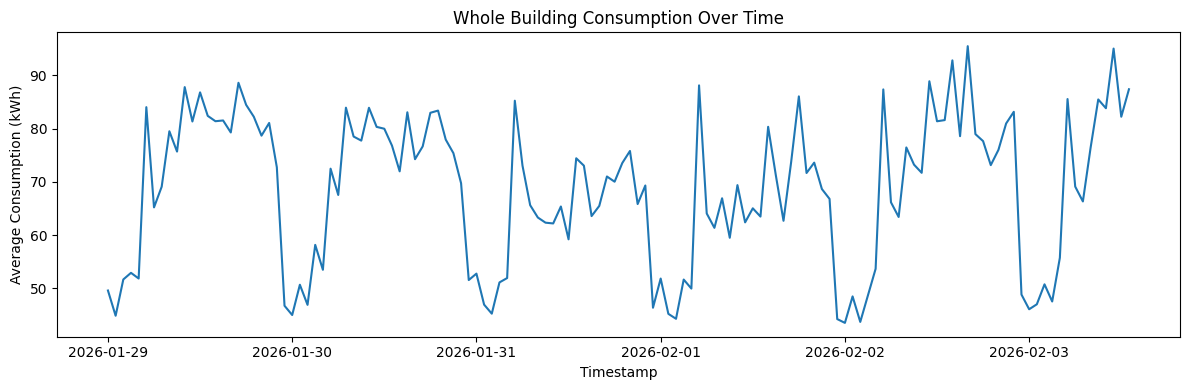

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(data['Timestamp'], data['Consumption_kWh'])
plt.xlabel('Timestamp')
plt.ylabel('Average Consumption (kWh)')
plt.title('Whole Building Consumption Over Time')
plt.tight_layout()
plt.show()

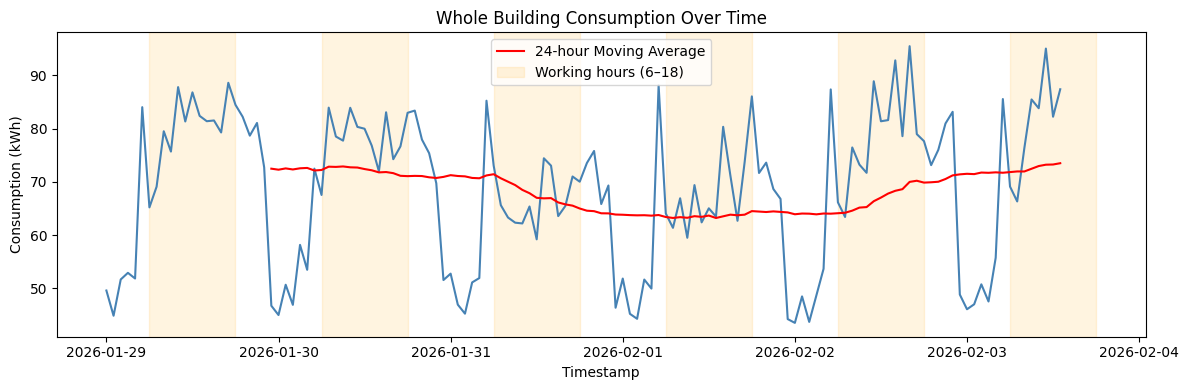

In [46]:
plot_data = data.sort_values("Timestamp").copy()
plot_data["Timestamp"] = pd.to_datetime(plot_data["Timestamp"])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(plot_data["Timestamp"], plot_data["Consumption_kWh"], color="steelblue")
ax.plot(data['Timestamp'], data['Consumption_kWh'].rolling(window=24).mean(), color="red", label="24-hour Moving Average")

days = pd.date_range(
    plot_data["Timestamp"].min().normalize(),
    plot_data["Timestamp"].max().normalize(),
    freq="D"
)

for i, d in enumerate(days):
    start = d + pd.Timedelta(hours=6)
    end = d + pd.Timedelta(hours=18)
    ax.axvspan(
        start, end,
        color="orange", alpha=0.12,
        label="Working hours (6–18)" if i == 0 else None
    )

ax.set_xlabel("Timestamp")
ax.set_ylabel("Consumption (kWh)")
ax.set_title("Whole Building Consumption Over Time")
ax.legend()
plt.tight_layout()
plt.show()